stats desc
Regressions sans amenites, methode loyers reels vs loyers imputés -> loyers imputes
Tests

In [123]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan
from IPython.display import display, Markdown


In [229]:
total_dataset_clean = pd.read_stata("data_base_enrichie_totalement_clean.dta") 


preparation des regression et regressions


Methode A avec les loyers reels

Methode B avec les loyers imputes. On va voir qu'on gardera cette methode pour la suite

In [135]:
# methode A 
y_method_A_reg1 = total_dataset_clean[['log_rent_reel','log_rent_reel_uc']]
X_reg_sans_amenite_sans_ownership = total_dataset_clean[['Numrooms', 'Utilrank', 'territory', 'level_educ', 'age', 'marital_status', 'gender']]

data_A_reg1 = pd.concat([X_reg_sans_amenite_sans_ownership, y_method_A_reg1], axis=1).dropna()
data_A_reg1

,Numrooms,Utilrank,territory,level_educ,age,marital_status,gender,log_rent_reel,log_rent_reel_uc
0,4.0,3.0,2,5.0,58.0,3.0,1.0,13.592367,13.245793
1,6.0,3.0,2,5.0,42.0,2.0,1.0,13.527828,12.554873
2,4.0,3.0,2,5.0,44.0,6.0,2.0,13.458836,13.112262
3,4.0,3.0,2,5.0,49.0,2.0,1.0,13.527828,12.978522
4,4.0,3.0,2,6.0,35.0,4.0,2.0,13.514405,12.965099
...,...,...,...,...,...,...,...,...,...
18017,4.0,1.0,7,6.0,36.0,3.0,1.0,12.765688,11.960969
18019,3.0,1.0,7,5.0,33.0,4.0,2.0,12.206073,11.656767
18062,2.0,1.0,11,5.0,20.0,2.0,2.0,11.156251,10.463103
18123,3.0,1.0,3,5.0,36.0,3.0,1.0,12.611538,12.062232


In [136]:
data_A_reg1['Utilrank'] = data_A_reg1['Utilrank'].astype(int)
data_A_reg1['territory'] = data_A_reg1['territory'].astype(int)

In [137]:
data_A_reg1

,Numrooms,Utilrank,territory,level_educ,age,marital_status,gender,log_rent_reel,log_rent_reel_uc
0,4.0,3,2,5.0,58.0,3.0,1.0,13.592367,13.245793
1,6.0,3,2,5.0,42.0,2.0,1.0,13.527828,12.554873
2,4.0,3,2,5.0,44.0,6.0,2.0,13.458836,13.112262
3,4.0,3,2,5.0,49.0,2.0,1.0,13.527828,12.978522
4,4.0,3,2,6.0,35.0,4.0,2.0,13.514405,12.965099
...,...,...,...,...,...,...,...,...,...
18017,4.0,1,7,6.0,36.0,3.0,1.0,12.765688,11.960969
18019,3.0,1,7,5.0,33.0,4.0,2.0,12.206073,11.656767
18062,2.0,1,11,5.0,20.0,2.0,2.0,11.156251,10.463103
18123,3.0,1,3,5.0,36.0,3.0,1.0,12.611538,12.062232


In [140]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

# regression
mod = smf.ols(formula='log_rent_reel ~ C(territory)+ Numrooms + C(Utilrank) + level_educ + age + marital_status + gender', data=data_A_reg1)
res = mod.fit()

# les colonnes a garder du .summary()
columns = ['R-squared', 'No. Observations', 'Adj. R-squared', 'F-statistic', 'Prob (F-statistic)']

# table finale
summary_table = summary_col([res], stars=True, float_format='%0.4f', model_names=['OLS'], info_dict={'R-squared': lambda x: f"{x.rsquared:0.3f}", 'No. Observations': lambda x: f"{int(x.nobs)}", 'F-statistic': lambda x: f"{x.fvalue:0.3f}", 'Prob (F-statistic)': lambda x: f"{x.f_pvalue:0.4f}", 'Robust Covariance': lambda x: f"{x.cov_type}"}, regressor_order=['C(territory)[T.1]','Numrooms', 'C(Utilrank)[T.1]', 'level_educ', 'age', 'marital_status', 'gender'])
display(summary_table)

,OLS
Numrooms,0.1864***
,(0.0046)
level_educ,0.0770***
,(0.0044)
age,0.0029***
,(0.0004)
marital_status,-0.0105***
,(0.0033)
gender,-0.0160*
,(0.0095)


In [141]:
mod = smf.ols(formula='log_rent_reel ~C(territory)+ Numrooms+ C(Utilrank)+ level_educ+ age+ marital_status+ gender', data=data_A_reg1)
res = mod.fit()
res.summary()
res.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,11.9895,0.038,312.234,0.000,11.914,12.065
C(territory)[T.2],-0.1751,0.024,-7.449,0.000,-0.221,-0.129
C(territory)[T.3],-0.5489,0.035,-15.841,0.000,-0.617,-0.481
C(territory)[T.4],-0.2415,0.023,-10.506,0.000,-0.287,-0.196
C(territory)[T.5],-0.6786,0.036,-18.835,0.000,-0.749,-0.608
C(territory)[T.6],-0.2897,0.022,-13.328,0.000,-0.332,-0.247
C(territory)[T.7],-0.6450,0.035,-18.373,0.000,-0.714,-0.576
C(territory)[T.8],-0.3483,0.022,-15.991,0.000,-0.391,-0.306
C(territory)[T.9],-0.8487,0.055,-15.413,0.000,-0.957,-0.741
C(territory)[T.10],-0.3866,0.023,-16.829,0.000,-0.432,-0.342


In [142]:
#reduction des coefficients avec unite de consommation (composition du menage)
#on veut reduire l'effet taille des menages 
#le coeff de gender devient significatif, lorsqu'on ajoute la composition des menages (unite de conso)

mod = smf.ols(formula='log_rent_reel_uc ~ C(territory)+Numrooms+ C(Utilrank)+ level_educ+ age+ marital_status+ gender', data=data_A_reg1)
res = mod.fit()
res.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,11.3313,0.043,261.534,0.000,11.246,11.416
C(territory)[T.2],-0.1182,0.027,-4.455,0.000,-0.170,-0.066
C(territory)[T.3],-0.4593,0.039,-11.746,0.000,-0.536,-0.383
C(territory)[T.4],-0.2434,0.026,-9.386,0.000,-0.294,-0.193
C(territory)[T.5],-0.5555,0.041,-13.664,0.000,-0.635,-0.476
C(territory)[T.6],-0.2337,0.025,-9.529,0.000,-0.282,-0.186
C(territory)[T.7],-0.5346,0.040,-13.495,0.000,-0.612,-0.457
C(territory)[T.8],-0.3045,0.025,-12.388,0.000,-0.353,-0.256
C(territory)[T.9],-0.8152,0.062,-13.121,0.000,-0.937,-0.693
C(territory)[T.10],-0.2967,0.026,-11.447,0.000,-0.348,-0.246


In [234]:
from IPython.display import display, Markdown

markdown = """

donc on maintient seulement par unite de consommation a partir de maintenant : 

#loyers imputes, uc (reg 1)

    #plus populee (en y)
    #une variable explicative supplementaire (own_status)
    #meilleur R2
    #les coefficients et les p-valeurs restent coherents

#donc on garde methode B avec loyers imputes 
#on conduit quelques tests, et on voit si on garde ce modele de regression

#ensuite, on ajoute les amenites (reg 2), et on compare avec cette reg (reg 1) 
"""
display(Markdown(markdown))



donc on maintient seulement par unite de consommation a partir de maintenant : 

#loyers imputes, uc (reg 1)

    #plus populee (en y)
    #une variable explicative supplementaire (own_status)
    #meilleur R2
    #les coefficients et les p-valeurs restent coherents

#donc on garde methode B avec loyers imputes 
#on conduit quelques tests, et on voit si on garde ce modele de regression

#ensuite, on ajoute les amenites (reg 2), et on compare avec cette reg (reg 1) 


,OLS
age,0.0133***
,(0.0003)
gender,-0.0418***
,(0.0098)
own_status,-0.0167*
,(0.0096)
Intercept,11.8497***
,(0.0411)
C(territory)[T.2],-0.0960***
,(0.0259)


RVF plot
heteroskedasticite illustree ici : nuage de point en forme de cone pas trop d'outliers genants, on decide de ne pas les traiter, garder les data pour garder une base de donnees la plus exhaustive possible


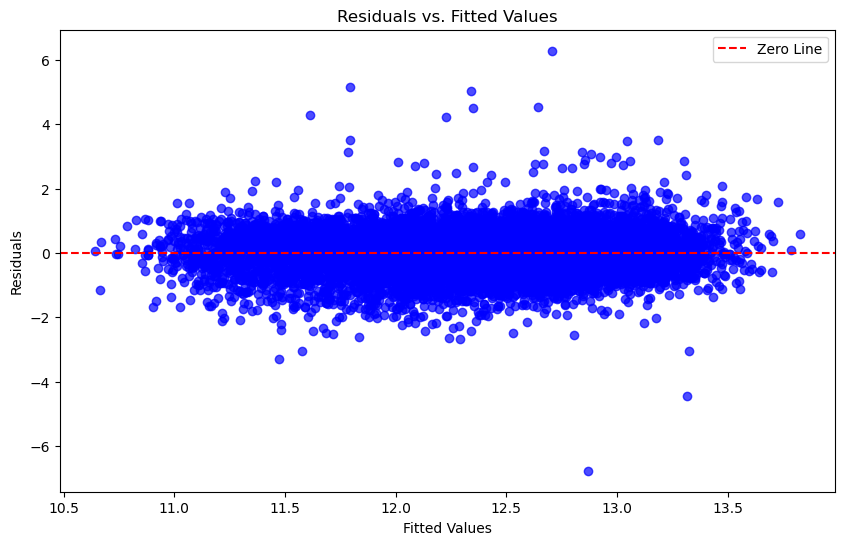

White Test for Heteroskedasticity:
Test Statistic: 476.12999526065704
P-Value: 1.0837020071924856e-29
F-Statistic: 2.7698310725574684
F-Test P-Value: 2.8081691975715973e-30
White robust standard error : on corrige l'heteroskedasticite


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,11.8497,0.045,263.474,0.000,11.762,11.938
C(territory)[T.2],-0.0960,0.027,-3.527,0.000,-0.149,-0.043
C(territory)[T.3],-0.6566,0.041,-15.981,0.000,-0.737,-0.576
C(territory)[T.4],-0.3265,0.026,-12.576,0.000,-0.377,-0.276
C(territory)[T.5],-0.8373,0.034,-24.454,0.000,-0.904,-0.770
C(territory)[T.6],-0.2719,0.025,-10.770,0.000,-0.321,-0.222
C(territory)[T.7],-0.9606,0.034,-28.535,0.000,-1.027,-0.895
C(territory)[T.8],-0.4422,0.026,-17.294,0.000,-0.492,-0.392
C(territory)[T.9],-1.2129,0.042,-29.061,0.000,-1.295,-1.131
C(territory)[T.10],-0.4905,0.026,-18.872,0.000,-0.541,-0.440


,OLS
age,0.0133***
,(0.0004)
gender,-0.0418***
,(0.0098)
own_status,-0.0167*
,(0.0094)
Intercept,11.8497***
,(0.0450)
C(territory)[T.2],-0.0960***
,(0.0272)


                    Variable        VIF
0                  Intercept  92.592144
1          C(territory)[T.2]   3.149868
2          C(territory)[T.3]   1.714853
3          C(territory)[T.4]   4.121190
4          C(territory)[T.5]   2.014954
5          C(territory)[T.6]   4.833792
6          C(territory)[T.7]   2.283801
7          C(territory)[T.8]   5.203610
8          C(territory)[T.9]   1.583994
9         C(territory)[T.10]   4.205399
10        C(territory)[T.11]   1.661861
11      C(level_educ)[T.3.0]   5.296381
12      C(level_educ)[T.4.0]   3.543330
13      C(level_educ)[T.5.0]   5.987834
14      C(level_educ)[T.6.0]   5.787405
15  C(marital_status)[T.2.0]   2.531928
16  C(marital_status)[T.3.0]   2.439957
17  C(marital_status)[T.4.0]   2.177007
18  C(marital_status)[T.5.0]   1.977912
19                       age   1.744548
20                    gender   1.306719
21                own_status   1.242931


In [244]:
############## reg baseline : sans amenite, juste categorie territoire + var sociocategorielles

y_method_B_reg1 = total_dataset_clean[['log_imputed_rent','log_imputed_rent_uc']]
X_reg_sans_amenite_avec_ownership = total_dataset_clean[['territory', 'level_educ', 'age', 'marital_status', 'gender', 'own_status']]

data_B_reg1 = pd.concat([X_reg_sans_amenite_avec_ownership, y_method_B_reg1], axis=1).dropna()
data_B_reg1
mod = smf.ols(formula='log_imputed_rent_uc ~ C(territory)+ C(level_educ)+ age+ C(marital_status)+ gender+own_status', data=data_B_reg1)
res = mod.fit()

# les colonnes a garder du .summary()
columns = ['R-squared', 'No. Observations', 'Adj. R-squared', 'F-statistic', 'Prob (F-statistic)']

# table finale
summary_table = summary_col([res], stars=True, float_format='%0.4f', model_names=['OLS'], info_dict={'R-squared': lambda x: f"{x.rsquared:0.3f}", 'No. Observations': lambda x: f"{int(x.nobs)}", 'F-statistic': lambda x: f"{x.fvalue:0.3f}", 'Prob (F-statistic)': lambda x: f"{x.f_pvalue:0.4f}", 'Robust Covariance': lambda x: f"{x.cov_type}"}, regressor_order=['C(territory)[T.1]', 'C(level_educ)', 'age', 'C(marital_status)', 'gender','own_status'])
display(summary_table)


#rvf plot
print("RVF plot")
print("heteroskedasticite illustree ici : nuage de point en forme de cone pas trop d'outliers genants, on decide de ne pas les traiter, garder les data pour garder une base de donnees la plus exhaustive possible")
# valeurs fittees + residus
fitted_values = res.fittedvalues
residuals = res.resid

# rvf plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

# test heteroskedasticite

residuals = res.resid
white_test_result = sms.het_white(residuals, res.model.exog)

print("White Test for Heteroskedasticity:")
print(f"Test Statistic: {white_test_result[0]}")
print(f"P-Value: {white_test_result[1]}")
print(f"F-Statistic: {white_test_result[2]}")
print(f"F-Test P-Value: {white_test_result[3]}")

# p-valeur proche de 0 : on rejete Ho 
# Ho est l'hypothese de variance constante  
# donc on est en presence d'heteroskedasticite, il faut utiliser des robust standard error

# on corrige l'heteroskedasticite avec des white robust standard errors (re-weighting des ecarts types)

results = mod.fit(cov_type='HC0')
print("White robust standard error : on corrige l'heteroskedasticite")
display(results.summary().tables[1])
summary_table = summary_col([results], stars=True, float_format='%0.4f', model_names=['OLS'], info_dict={'R-squared': lambda x: f"{x.rsquared:0.3f}", 'No. Observations': lambda x: f"{int(x.nobs)}", 'F-statistic': lambda x: f"{x.fvalue:0.3f}", 'Prob (F-statistic)': lambda x: f"{x.f_pvalue:0.4f}", 'Robust Covariance': lambda x: f"{x.cov_type}"}, regressor_order=['C(territory)[T.1]','Numrooms', 'C(Utilrank)[T.1]', 'level_educ', 'age', 'marital_status', 'gender','own_status'])
display(summary_table)

# test de multicollinearite 

# d'apres la note [2] au dessus, il semble 
X = results.model.exog
vif = pd.DataFrame()
vif["Variable"] = results.params.index
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif)

# pas de multicollinearite (VIF de toutes les vars < 10)
# le VIF fort sur l'intercept n'est pas important. en effet, l'intercept est naturellement sensible a des changements de points dans le nuage de donnees, pour fitter la droite de regression
# dans notre cas, on ne s'occupe pas de la sensitivite de l'intercept y. Sinon, on devrait centrer les valeurs de x 

In [237]:
vif['VIF'].mean() #vif moyen <10 meme avec vif de l'intercept

7.154609899894769

In [238]:
vif.drop(index=vif.index[0], axis=0, inplace=True)
vif

,Variable,VIF
1,C(territory)[T.2],3.149868
2,C(territory)[T.3],1.714853
3,C(territory)[T.4],4.121190
4,C(territory)[T.5],2.014954
5,C(territory)[T.6],4.833792
6,C(territory)[T.7],2.283801
7,C(territory)[T.8],5.203610
8,C(territory)[T.9],1.583994
9,C(territory)[T.10],4.205399
10,C(territory)[T.11],1.661861


In [239]:
vif['VIF'].mean() #vif moyen <10 tres faible, sans intercept

3.086155877859984

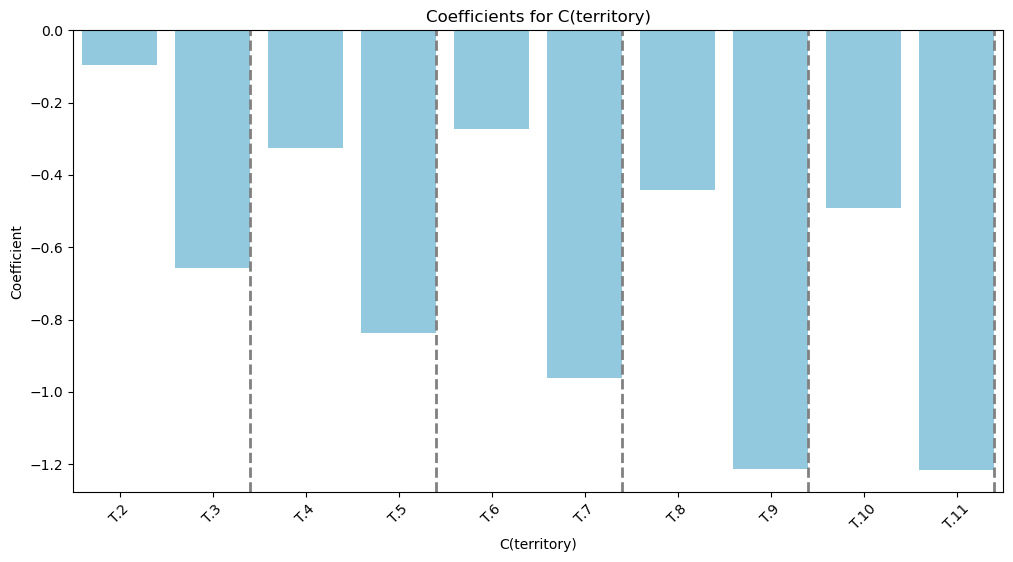

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract coefficients and territory categories from the summary table
coefficients = results.params.loc['C(territory)[T.2]': 'C(territory)[T.11]']
territories = [f'T.{i}' for i in range(2, 12)]

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=territories, y=coefficients, color='skyblue')

# Add a separating line after every odd index
for i, bar in enumerate(ax.patches):
    if i % 2 != 0:
        ax.axvline(x=bar.get_x() + bar.get_width(), color='gray', linestyle='--', linewidth=2.0)

plt.title('Coefficients for C(territory)')
plt.xlabel('C(territory)')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()

In [248]:
markdown = """

Ce graphique illustre comment interpreter nos coefficients de la variable categorielle territory : la reference etant Bogota (territory ==1), les coefficients mesurent les ecarts des depenses en logement dans le territoire donné par rapport à bogota. Entre les pointillés, on délimite les aires urbaines (comme catégorisées dans notre taxonomie). Ainsi T.2 et T.3 forment les grandes aires urbaines des villes majeures (hors bogota), T.4 et T.5 forment les aires urbaines des grandes villes avec grandes capitales, et ainsi de suite. On voit clairement qu'il y a un effet d'agglomeration autour des centres urbains : plus on s'eloigne du centre, et moins on depense en logement (et donc selon l'hypothese monocentrique, on depense plus dans le poste des transports). On remarque aussi un effet de la taille des aires urbaines : plus l'aire urbaine est grande (en terme de densité de population) et plus le cout de la vie est proche de la reference. 

Cependant, les effets d'agglomerations sont tres forts, donc sur-estimés. Il y a surement un probleme de reverse causality, specifiquement car on etudie un pays en developpement avec des tailles d'agglomerations plus grandes, une plus forte reactivité à la demande due à la croissance économique accrue. On identifie un canal de transmission qui va dans les deux sens, ce qui expliquerait la reverse causality. Le canal causal est le suivant : activité économique concentrée dans un territoire donné (effet d'agglomération) -> augmentation de la demande de logements (ou demande pour les amenités) -> augmentation de la consommation de loyer. Cependant, il existe également un canal inverse possible : demande accrue de conditions de vie (amenités) -> demande accrue de logement dans un territoire donné -> concentration de la population (effet d'agglomération). Contrôler par les amenités minimise l'effet de ce deuxième canal pour ne conserver que le premier canal qui nous intéresse. 

Il est essentiel de trouver de bonnes variables de controles d'amenités pour ne pas surestimer les effets d'agglomération de la structure urbaine monocentrique. Soulignons tout d'abord un aspect important du modèle monocentrique, à savoir que l'hypothèse monocentrique qui se base sur l'utilité de l'individu, son choix de résidence et sa contrainte budgétaire. Ainsi, ce modèle de choix microéconomique peut également être interprété selon une approche marshallienne, avec l'effet de la demande sur les amenités à un lieu donné. Prenons par exemple une augmentation de la demande de logements et d'équipements en se rapprochant du centre-ville. En régressant le loyer avec des variables d'équipements, nous éviterons les problèmes de reverse causality. """
display(Markdown(markdown))







Ce graphique illustre comment interpreter nos coefficients de la variable categorielle territory : la reference etant Bogota (territory ==1), les coefficients mesurent les ecarts des depenses en logement dans le territoire donné par rapport à bogota. Entre les pointillés, on délimite les aires urbaines (comme catégorisées dans notre taxonomie). Ainsi T.2 et T.3 forment les grandes aires urbaines des villes majeures (hors bogota), T.4 et T.5 forment les aires urbaines des grandes villes avec grandes capitales, et ainsi de suite. On voit clairement qu'il y a un effet d'agglomeration autour des centres urbains : plus on s'eloigne du centre, et moins on depense en logement (et donc selon l'hypothese monocentrique, on depense plus dans le poste des transports). On remarque aussi un effet de la taille des aires urbaines : plus l'aire urbaine est grande (en terme de densité de population) et plus le cout de la vie est proche de la reference. 

Cependant, les effets d'agglomerations sont tres forts, donc sur-estimés. Il y a surement un probleme de reverse causality, specifiquement car on etudie un pays en developpement avec des tailles d'agglomerations plus grandes, une plus forte reactivité à la demande due à la croissance économique accrue. On identifie un canal de transmission qui va dans les deux sens, ce qui expliquerait la reverse causality. Le canal causal est le suivant : activité économique concentrée dans un territoire donné (effet d'agglomération) -> augmentation de la demande de logements (ou demande pour les amenités) -> augmentation de la consommation de loyer. Cependant, il existe également un canal inverse possible : demande accrue de conditions de vie (amenités) -> demande accrue de logement dans un territoire donné -> concentration de la population (effet d'agglomération). Contrôler par les amenités minimise l'effet de ce deuxième canal pour ne conserver que le premier canal qui nous intéresse. 

Il est essentiel de trouver de bonnes variables de controles d'amenités pour ne pas surestimer les effets d'agglomération de la structure urbaine monocentrique. Soulignons tout d'abord un aspect important du modèle monocentrique, à savoir que l'hypothèse monocentrique qui se base sur l'utilité de l'individu, son choix de résidence et sa contrainte budgétaire. Ainsi, ce modèle de choix microéconomique peut également être interprété selon une approche marshallienne, avec l'effet de la demande sur les amenités à un lieu donné. Prenons par exemple une augmentation de la demande de logements et d'équipements en se rapprochant du centre-ville. En régressant le loyer avec des variables d'équipements, nous éviterons les problèmes de reverse causality. 